In [1]:
%matplotlib notebook
from PIL import Image
import PIL
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as col
import scipy.stats

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)

data comes from: http://theannarbormarathon.com/

# you can download data from my gdrive
https://drive.google.com/file/d/0B-1GdQp1pSUGTGxhWndTZ2toMTg/view?usp=sharing
https://drive.google.com/file/d/0B-1GdQp1pSUGSm5PRWZtZlNPejA/view?usp=sharing
https://drive.google.com/file/d/0B-1GdQp1pSUGSlBYYlNuSERYQ00/view?usp=sharing
https://drive.google.com/file/d/0B-1GdQp1pSUGS1pQWHZEdmFzTjg/view?usp=sharing

In [3]:
df2014 = pd.read_csv("AnnArbor/Ann Arbor Marathon 30MAR2014 - Arkusz1.csv", )
df2015 = pd.read_csv("AnnArbor/Ann Arbor Marathon 29MAR2015 - Arkusz1.csv", )
df2016 = pd.read_csv("AnnArbor/Ann Arbor Marathon 03APR2016 - Arkusz1.csv",)
df2017 = pd.read_csv("AnnArbor/Ann Arbor Marathon 26MAR2017 - Arkusz1.csv",)

In [4]:
cat = pd.DataFrame([df2014.columns, df2015.columns, df2016.columns, df2016.columns])

In [5]:
cat.T

,0,1,2,3
0,POS,POS,POS,POS
1,START_NUMBER,START_NUMBER,RACE_NO,RACE_NO
2,NAME,NAME,NAME,NAME
3,TIME,NET_TIME,NET_TIME,NET_TIME
4,NET_TIME,CATEGORY,CATEGORY,CATEGORY
5,CATEGORY,CAT_POS,CAT_POS,CAT_POS
6,CAT_POS,GENDER,AGE,AGE
7,AGE,GEN_POS,GENDER,GENDER
8,GENDER,CITY,GEN_POS,GEN_POS
9,GEN_POS,STATE,CITY,CITY


In [6]:
df2014.tail(50)

,POS,START_NUMBER,NAME,TIME,NET_TIME,CATEGORY,CAT_POS,AGE,GENDER,GEN_POS,...,Unnamed: 15,Unnamed: 16,13.1M,O/POS,C/POS,G/POS,FINISH,O/POS.1,C/POS.1,G/POS.1
237,238.0,289,Rex Timbs,5:58:57.0,5:57:12.0,45-49,21.0,48,Male,167.0,...,NaN,NaN,2:53:16.3,240.0,21.0,170.0,5:58:57.1,238.0,21.0,167.0
238,239.0,86,Martin Roedel,5:58:58.0,5:57:23.0,60-64,8.0,60,Male,168.0,...,NaN,NaN,2:44:27.7,236.0,8.0,166.0,5:58:58.1,239.0,8.0,168.0
239,240.0,45,John Yoon,6:09:26.0,6:08:19.0,25-29,23.0,27,Male,169.0,...,NaN,NaN,2:10:11.6,159.0,20.0,124.0,6:09:26.9,240.0,23.0,169.0
240,241.0,6,Rick Rayman,6:21:32.0,6:20:54.0,65-69,4.0,67,Male,170.0,...,NaN,NaN,2:53:15.6,239.0,3.0,169.0,6:21:32.0,241.0,3.0,170.0
241,242.0,167,Thomas Podruchny,6:21:32.0,6:19:12.0,70+,5.0,76,Male,171.0,...,NaN,NaN,3:08:25.9,245.0,6.0,173.0,6:21:32.0,242.0,5.0,171.0
242,243.0,244,Dominick Demarco,6:21:32.0,6:18:59.0,65-69,3.0,66,Male,172.0,...,NaN,NaN,3:03:22.6,241.0,4.0,171.0,6:21:32.0,243.0,4.0,172.0
243,244.0,245,Nancy Dukett,6:21:32.0,6:18:53.0,50-54,5.0,54,Female,72.0,...,NaN,NaN,3:04:32.1,244.0,5.0,72.0,6:21:32.0,244.0,5.0,72.0
244,245.0,249,Joann Hunt,6:21:32.0,6:18:58.0,45-49,12.0,48,Female,73.0,...,NaN,NaN,3:04:29.9,243.0,12.0,71.0,6:21:32.0,245.0,12.0,73.0
245,246.0,258,Alan Salmon,6:21:32.0,6:18:54.0,60-64,9.0,61,Male,173.0,...,NaN,NaN,3:04:27.7,242.0,9.0,172.0,6:21:32.0,246.0,9.0,173.0
246,NaN,8,Bruce Purdy,Not started,0.0,55-59,NaN,57,Male,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2016.head()

,POS,RACE_NO,NAME,NET_TIME,CATEGORY,CAT_POS,AGE,GENDER,GEN_POS,CITY,STATE,PACE
0,1,342,Matthew Popielarz,02:29:33,Overall,1,24,Male,1,Ann Arbor,MI,5:42 min/m
1,2,269,Chris Elsey,02:43:42,30-34,1,30,Male,2,South Lyon,MI,6:14 min/m
2,3,249,Greg Kuhl,02:53:52,25-29,1,29,Male,3,Canal Winchester,OH,6:38 min/m
3,4,101,Andrew Bucci,02:58:56,Masters,1,43,Male,4,Rochester,NY,6:49 min/m
4,5,461,Sean Kearney,02:59:46,30-34,2,34,Male,5,NaN,MI,6:51 min/m


In [8]:
x2014 = pd.to_timedelta(df2014.NET_TIME[:246]).apply(lambda x: x.total_seconds()/3600)
x2015 = pd.to_timedelta(df2015.NET_TIME[:323]).apply(lambda x: x.total_seconds()/3600)
x2016 = pd.to_timedelta(df2016.NET_TIME).apply(lambda x: x.total_seconds()/3600)
x2017 = pd.to_timedelta(df2017.NET_TIME[:315]).apply(lambda x: x.total_seconds()/3600)

In [9]:
plt.close()

<IPython.core.display.Javascript object>


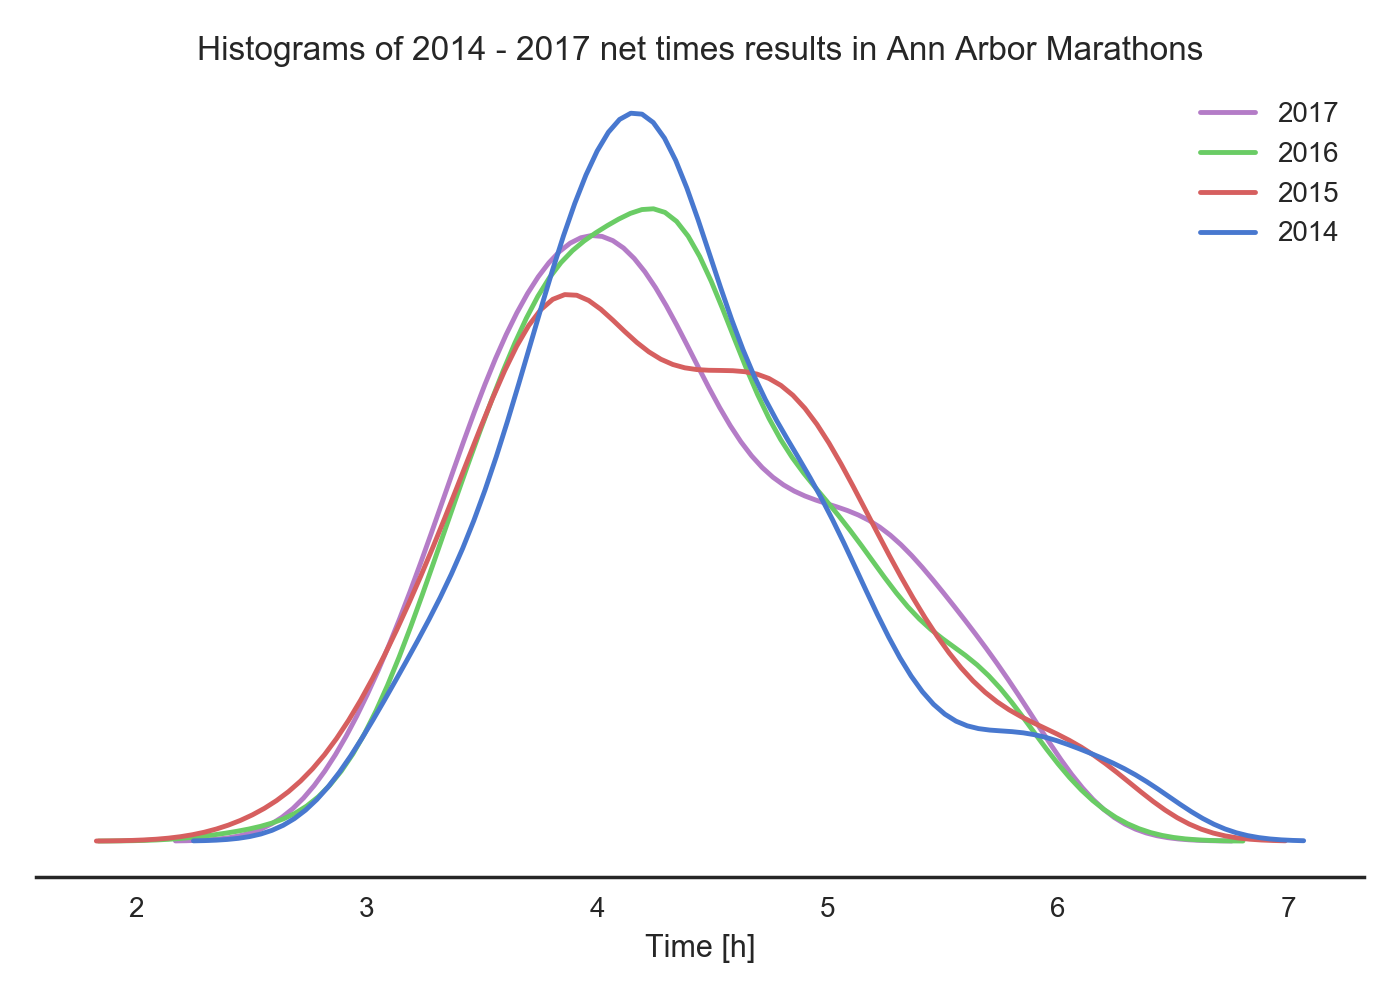

In [10]:
fig, ax = plt.subplots(figsize=(7, 5),)
sns.despine(left=True)
sns.distplot(x2017, kde=True, ax=ax, hist=False, label='2017', color='m')
sns.distplot(x2016, kde=True, ax=ax, hist=False, label='2016', color='g')
sns.distplot(x2015, kde=True, ax=ax, hist=False, label='2015', color='r')
sns.distplot(x2014, kde=True, ax=ax, hist=False, label='2014', color='b')
plt.title('Histograms of 2014 - 2017 net times results in Ann Arbor Marathons')
plt.xlabel('Time [h]')
plt.setp(ax, yticks=[])
plt.tight_layout()
plt.savefig('1HistAll.png', dpi=100, frameon=False)

<IPython.core.display.Javascript object>


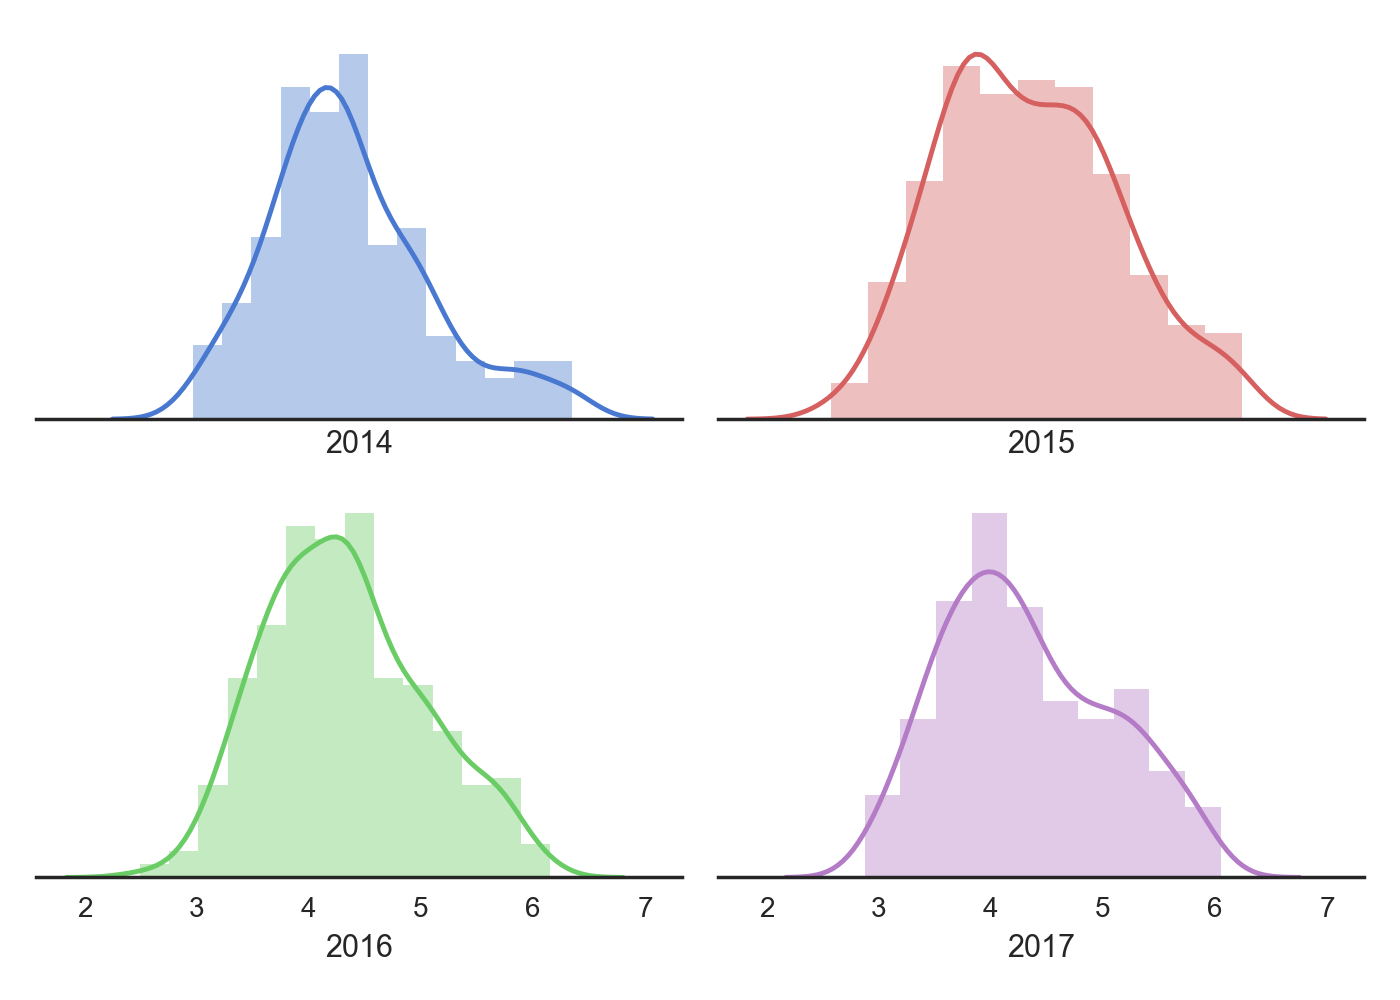

In [11]:
f, axes = plt.subplots(2, 2, figsize=(7, 5), sharex=True)
sns.despine(left=True)
sns.distplot(x2014, hist=True, color="b", ax=axes[0, 0], label='2014')
sns.distplot(x2015, hist=True, color="r", ax=axes[0, 1], label='2015')
sns.distplot(x2016, hist=True, color="g", ax=axes[1, 0], label='2016')
sns.distplot(x2017, hist=True, color="m", ax=axes[1, 1], label='2017')
axes[0][0].set_xlabel('2014')
axes[0][1].set_xlabel('2015')
axes[1][0].set_xlabel('2016')
axes[1][1].set_xlabel('2017')
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.savefig('3Histograms.png', dpi=100, frameon=False)

In [12]:
plt.close()

In [13]:
g14 = df2014.GENDER[:246].value_counts()
g15 = df2015.GENDER[:323].value_counts()
g16 = df2016.GENDER.value_counts()
g17 = df2017.GENDER[:315].value_counts()

In [14]:
g17.index

Index(['M', 'F'], dtype='object')

In [15]:
g17.index = ['Male', 'Female']

In [16]:
plt.close()

In [17]:
def autolabel(rects, gender):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                gender + ' ' + str(int(height)), ha='center', va='bottom', )

<IPython.core.display.Javascript object>


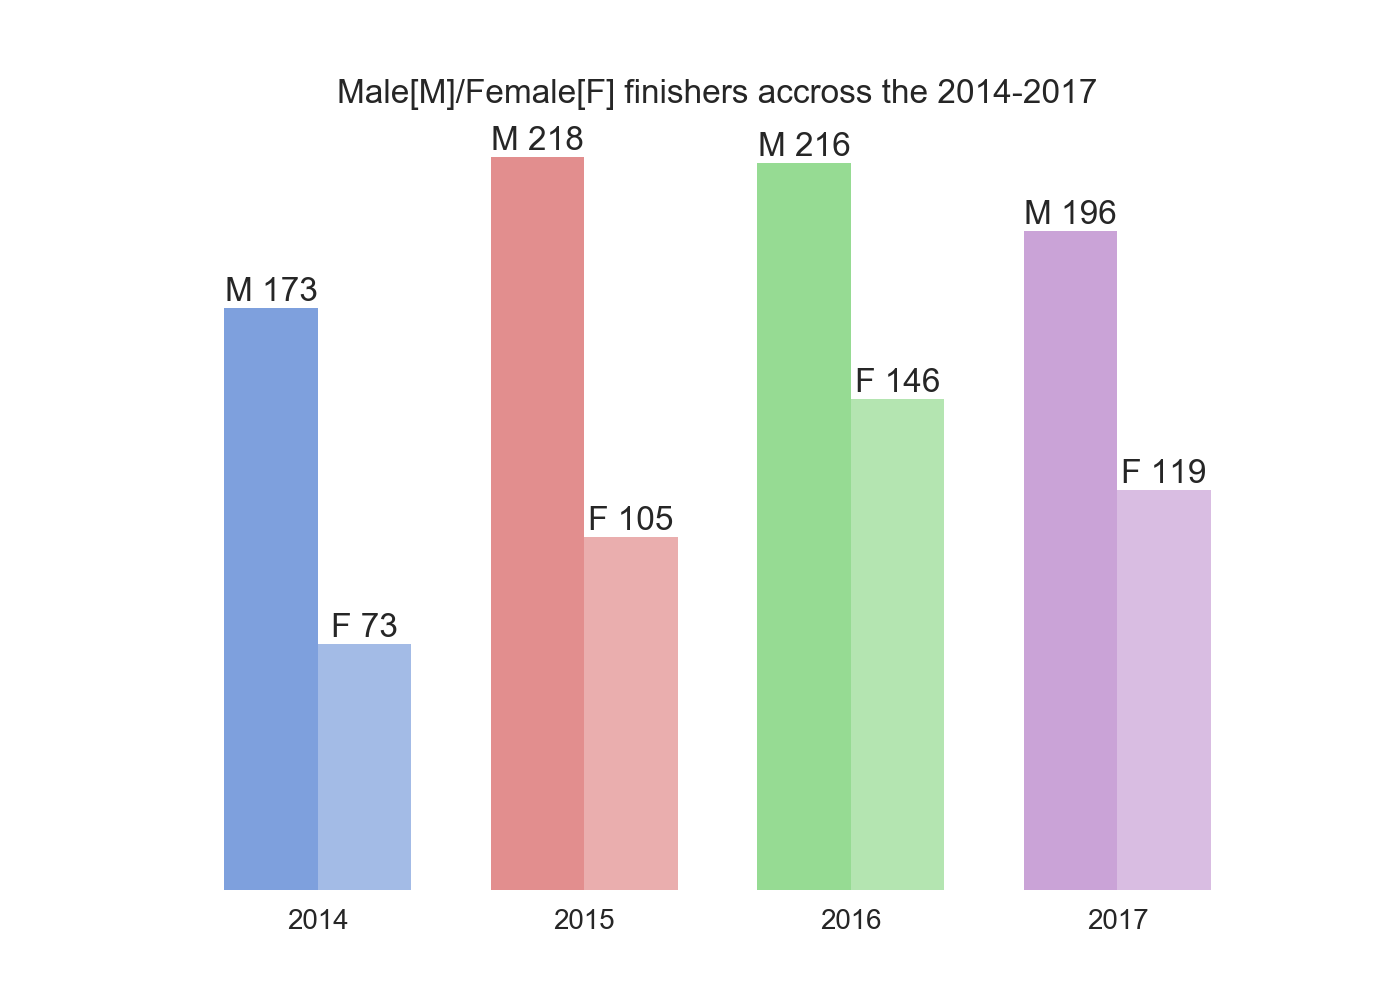

In [18]:
N = 4
men = (g14[0], g15[0], g16[0], g17[0])

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(7, 5),)

rects1 = ax.bar(ind, men, width, color=['b', 'r', 'g', 'm'], alpha=0.7)
women = (g14[1], g15[1], g16[1], g17[1])
rects2 = ax.bar(ind + width, women, width, color=['b', 'r', 'g', 'm'], alpha=0.5, )
ax.set_xticklabels(('2014', '2015', '2016', '2017'))
ax.set_xticks(ind + width / 2)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#plt.setp(ax, yticks=[], )
autolabel(rects1, 'M')
autolabel(rects2, 'F')
ax.tick_params(labelleft='off')
ax.set_title('Male[M]/Female[F] finishers accross the 2014-2017')
plt.show()
plt.savefig('4genders.png', dpi=100, frameon=False)

In [19]:
df2014['NET_TIME_PROC'] = pd.to_timedelta(df2014.NET_TIME[:246]).apply(lambda x: x.total_seconds()/3600)
df2015['NET_TIME_PROC'] = pd.to_timedelta(df2015.NET_TIME[:323]).apply(lambda x: x.total_seconds()/3600)
df2016['NET_TIME_PROC'] = pd.to_timedelta(df2016.NET_TIME).apply(lambda x: x.total_seconds()/3600)
df2017['NET_TIME_PROC'] = pd.to_timedelta(df2017.NET_TIME[:315]).apply(lambda x: x.total_seconds()/3600)

<IPython.core.display.Javascript object>


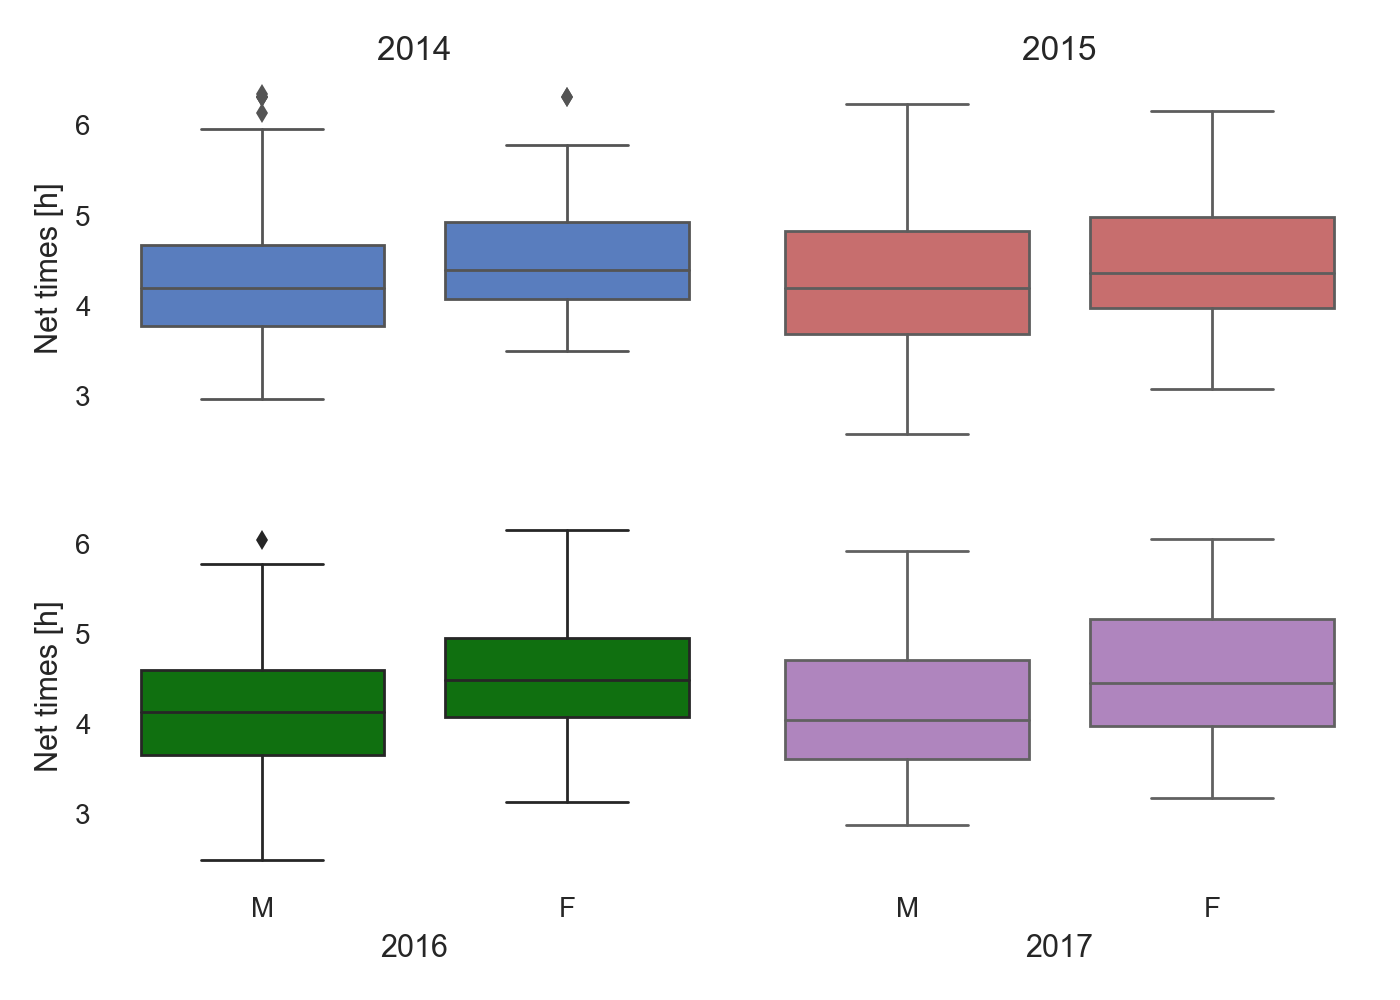

In [20]:
f, axes = plt.subplots(2, 2, figsize=(7, 5), squeeze=True, sharex=True, sharey=True)
sns.despine(left=True)
sns.boxplot(df2014.GENDER, df2014.NET_TIME_PROC, color="b", ax=axes[0, 0], linewidth=1, )
sns.boxplot(df2015.GENDER, df2015.NET_TIME_PROC, color="r", ax=axes[0, 1], linewidth=1, )
sns.boxplot(df2016.GENDER, df2016.NET_TIME_PROC, color='green', ax=axes[1, 0], linewidth=1, )
sns.boxplot(df2017.GENDER, df2017.NET_TIME_PROC, color="m", ax=axes[1, 1], linewidth=1, )

axes[0][0].set_title('2014')
axes[0][0].set_xlabel('')
axes[0][0].set_ylabel('Net times [h]')
axes[0][0].spines['bottom'].set_visible(False)
axes[0][1].set_title('2015')
axes[0][1].set_xlabel('')
axes[0][1].set_ylabel('')

axes[0][1].spines['bottom'].set_visible(False)
axes[1][0].set_xlabel('2016')
axes[1][0].set_ylabel('Net times [h]')
axes[1][0].spines['bottom'].set_visible(False)
axes[1][1].set_xlabel('2017')
axes[1][1].spines['bottom'].set_visible(False)
axes[1][1].set_ylabel('')


#plt.setp(axes, ylabel='Net time [h]',)
plt.tight_layout()
plt.savefig('5netTimes.png', dpi=100, frameon=False)

<IPython.core.display.Javascript object>


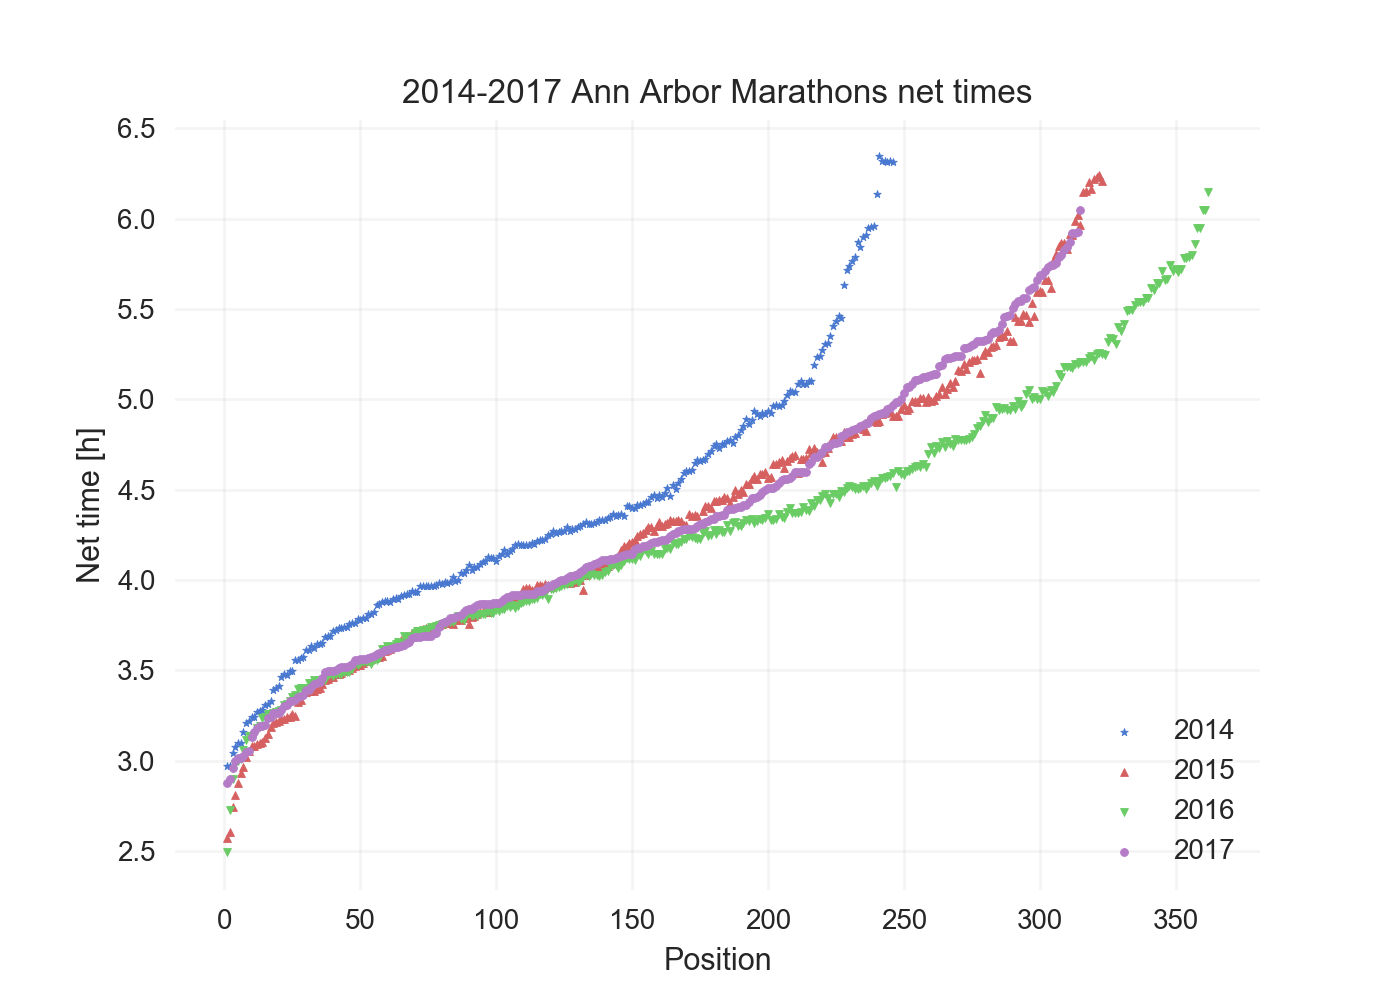

In [21]:
fig = plt.figure(figsize=(7, 5), frameon=False)
plt.scatter(df2014.POS, df2014.NET_TIME_PROC, s=8, c='b', label='2014', marker='*')
plt.scatter(df2015.POS, df2015.NET_TIME_PROC, s=8, c='r', label='2015', marker='^')
plt.scatter(df2016.POS, df2016.NET_TIME_PROC, s=8, c='g', label='2016', marker='v')
plt.scatter(df2017.POS, df2017.NET_TIME_PROC, s=8, c='m', label='2017')
plt.legend(loc=4)
plt.title("2014-2017 Ann Arbor Marathons net times")
plt.xlabel('Position')
plt.ylabel('Net time [h]')
plt.grid(alpha=0.2)
a=fig.gca()
a.spines['bottom'].set_visible(False)
a.spines['top'].set_visible(False)
a.spines['left'].set_visible(False)
a.spines['right'].set_visible(False)
fig.show()
fig.savefig('2NetTimesAll.png', dpi=100, frameon=False)

<IPython.core.display.Javascript object>


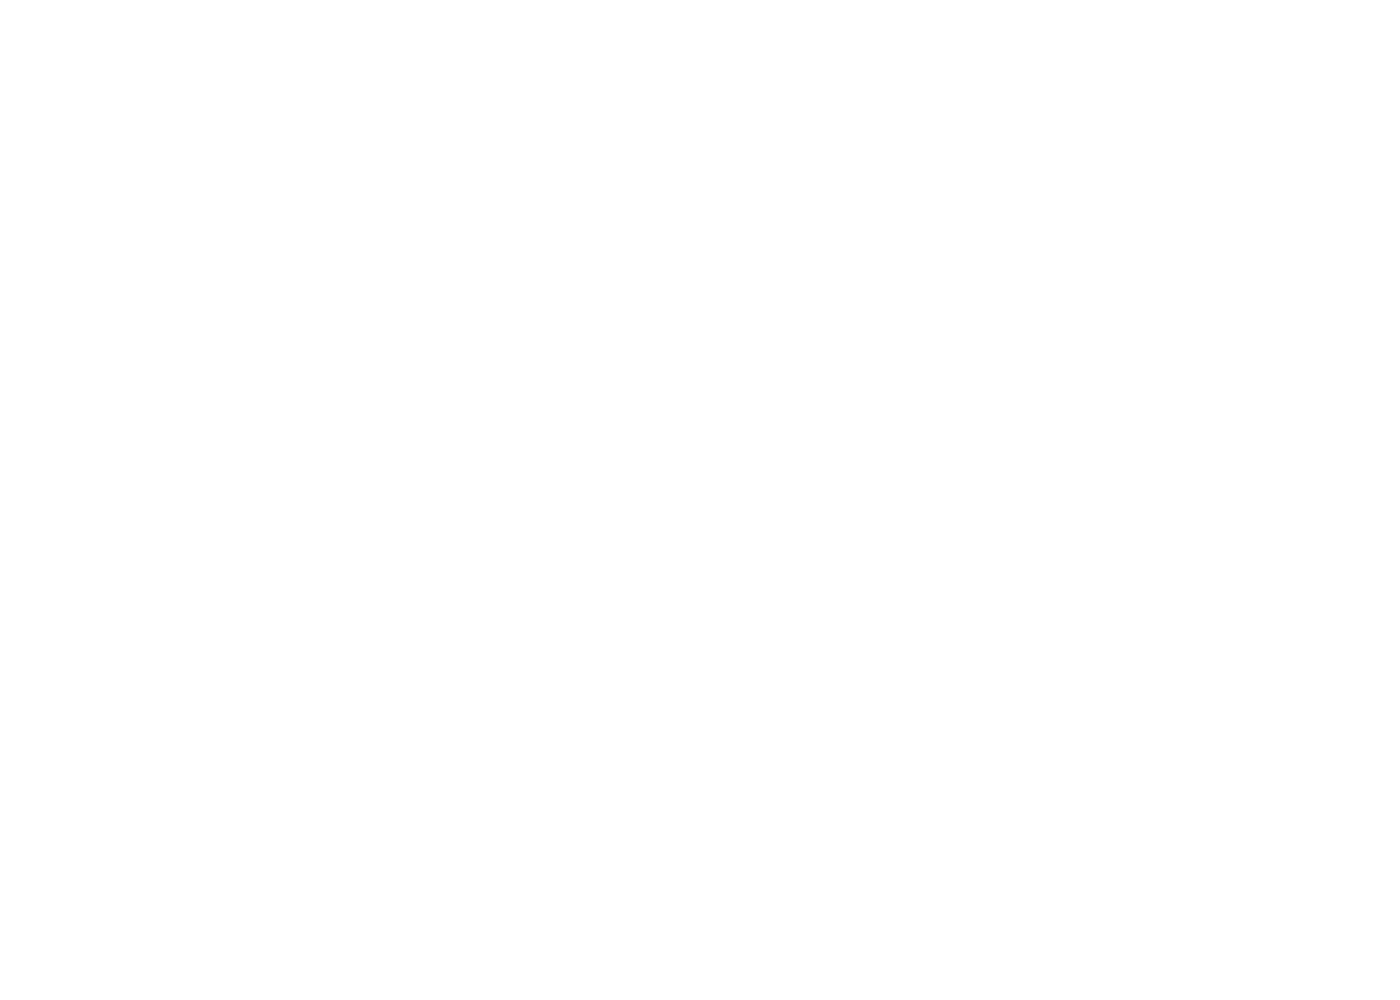

In [23]:
f, ax1 = plt.subplots(1, 1, figsize=(7, 5),)
sns.despine(left=True)
sns.violinplot(df2014.CATEGORY, df2014.NET_TIME_PROC, color="b", ax=ax1, linewidth=1, )

ax1.set_title('2014 Net times in categories')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Net times [h]')
ax1.spines['bottom'].set_visible(False)
for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

ax1.yaxis.grid(alpha=0.2)
#plt.setp(axes, ylabel='Net time [h]',)
plt.tight_layout()
plt.savefig('6vilin2014.png', dpi=100, )

In [24]:
plt.close()

<IPython.core.display.Javascript object>


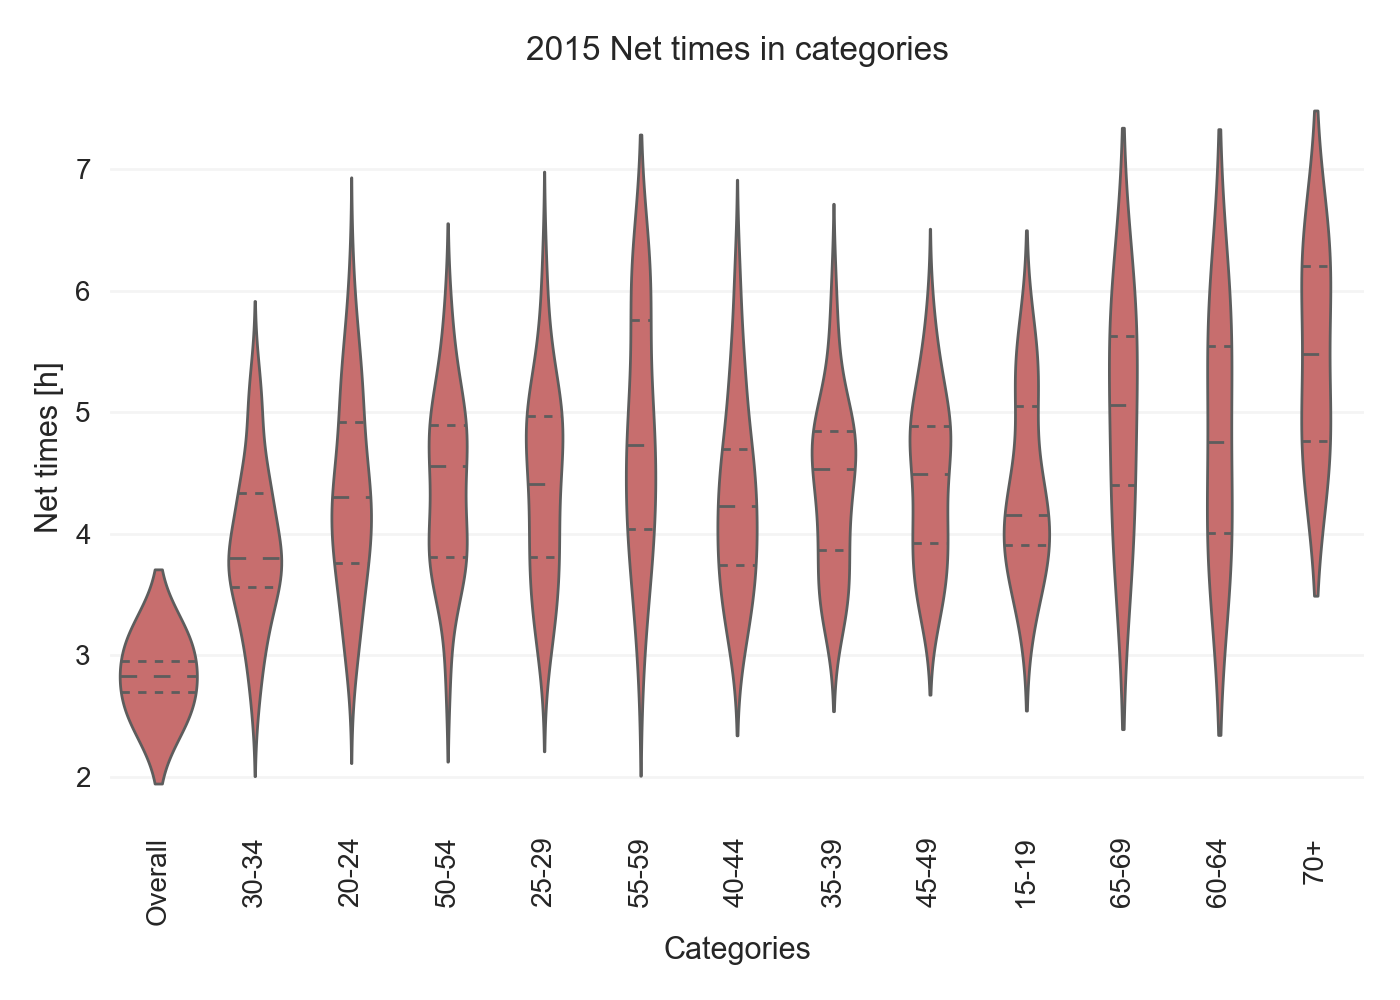

In [25]:
f, ax1 = plt.subplots(1, 1, figsize=(7, 5),)
sns.despine(left=True)
sns.violinplot(df2015.CATEGORY, df2015.NET_TIME_PROC, color="r", linewidth=1, inner='quartile')

ax1.set_title('2015 Net times in categories')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Net times [h]')
ax1.spines['bottom'].set_visible(False)
for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

ax1.yaxis.grid(alpha=0.2)

#plt.setp(axes, ylabel='Net time [h]',)
plt.tight_layout()
plt.savefig('7vilin2015.png', dpi=100, )

<IPython.core.display.Javascript object>


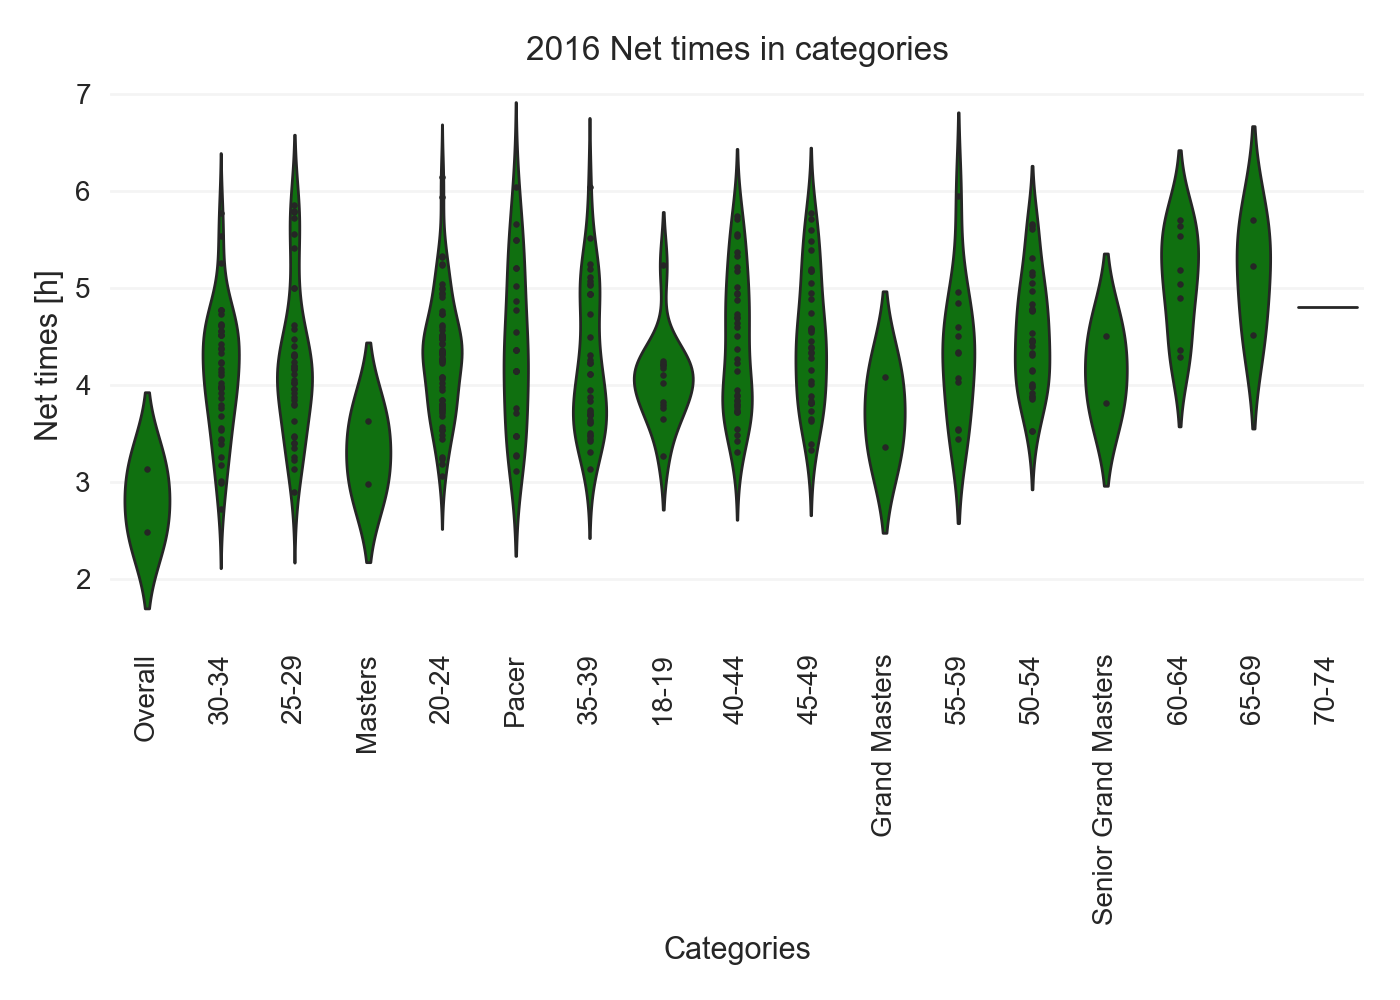

In [26]:
f, ax1 = plt.subplots(1, 1, figsize=(7, 5),)
sns.despine(left=True)
sns.violinplot(df2016.CATEGORY, df2016.NET_TIME_PROC, color='green', linewidth=1, inner='point')

ax1.set_title('2016 Net times in categories')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Net times [h]')
ax1.spines['bottom'].set_visible(False)
for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

ax1.yaxis.grid(alpha=0.2)

#plt.setp(axes, ylabel='Net time [h]',)
plt.tight_layout()
plt.savefig('8vilin2016.png', dpi=100, )

<IPython.core.display.Javascript object>


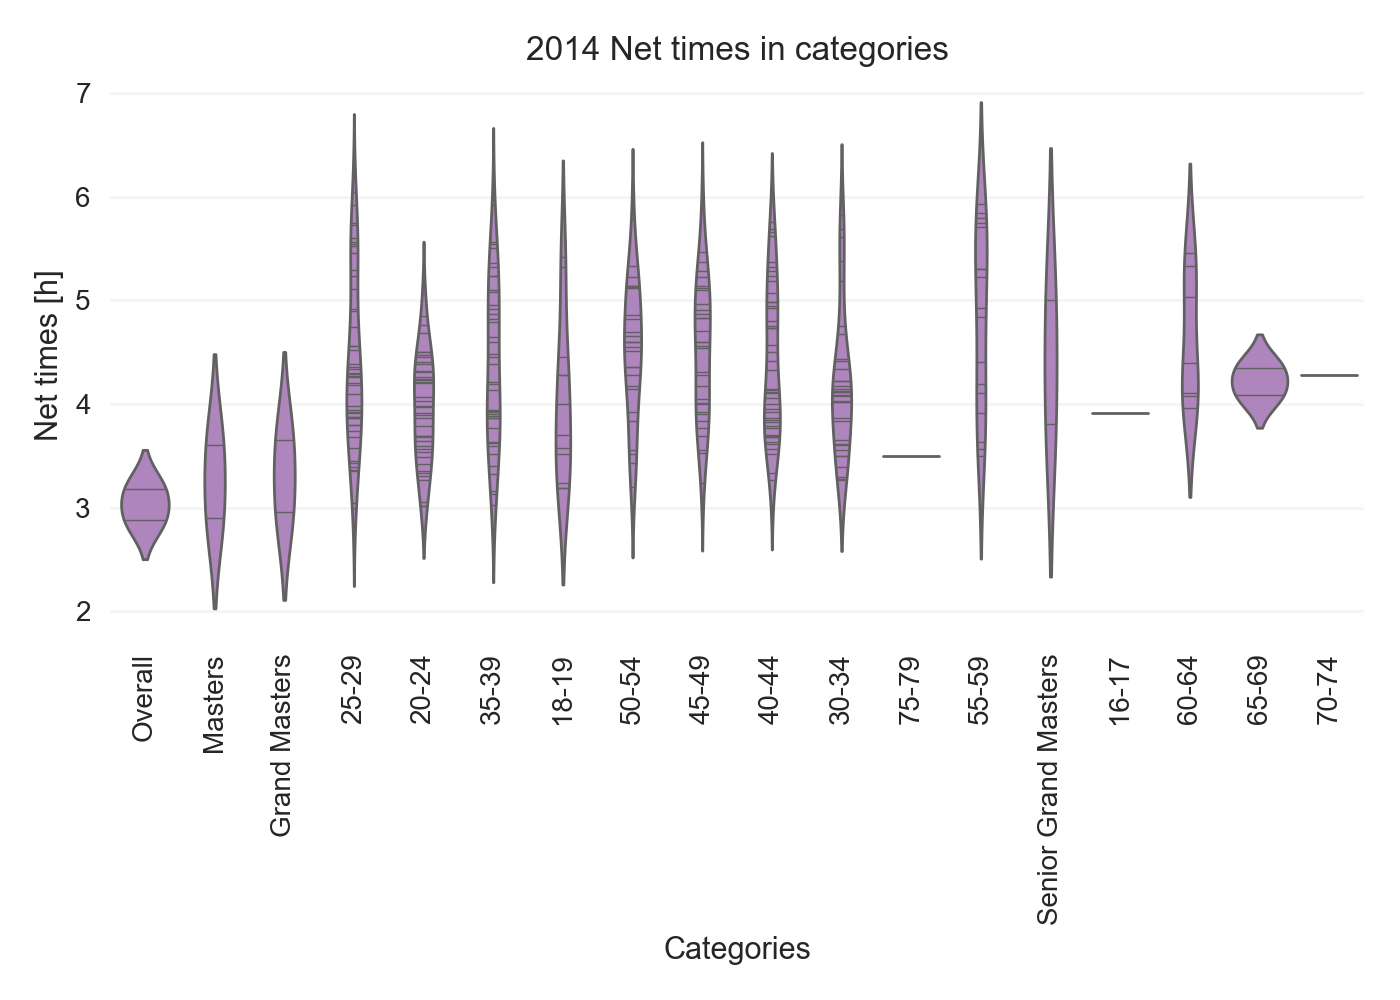

In [27]:
f, ax1 = plt.subplots(1, 1, figsize=(7, 5),)
sns.despine(left=True)
sns.violinplot(df2017.CATEGORY, df2017.NET_TIME_PROC, color="m", linewidth=1, inner='stick')

ax1.set_title('2014 Net times in categories')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Net times [h]')
ax1.spines['bottom'].set_visible(False)
for ax in f.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

ax1.yaxis.grid(alpha=0.2)
#plt.setp(axes, ylabel='Net time [h]',)
plt.tight_layout()
plt.savefig('9vilin2017.png', dpi=100, )

In [28]:
list_im = ['1HistAll.png', '2NetTimesAll.png', '3Histograms.png', '4genders.png', '5netTimes.png',
           '6vilin2014.png', '7vilin2015.png', '8vilin2016.png', '9vilin2017.png', ]
imgs= [PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save('0horizontal.jpg')    

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray(i.resize((min_shape), Image.ANTIALIAS))) for i in imgs ) 
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save('0vertical.png', )